In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
rhpass=pd.read_csv("attack_freebsd.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-18 10:42:32,10.10.10.15,10.10.10.255,BROWSER,243,"Local Master Announcement XP, Workstation, Ser..."
1,2,2011-11-18 10:43:14,3com_68:a6:95,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.1
2,3,2011-11-18 10:43:46,10.10.10.10,224.0.0.251,MDNS,78,"Standard query 0x0000 SRV _domain._udp.local,..."
3,4,2011-11-18 10:44:04,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15
4,5,2011-11-18 10:44:04,3com_68:a6:95,Tp-LinkT_b5:79:3f,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95


In [4]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [5]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 10:42:32,10.10.10.15,10.10.10.255,BROWSER,243,"Local Master Announcement XP, Workstation, Ser...",Client
1,2,2011-11-18 10:43:14,3com_68:a6:95,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.1,Server
2,3,2011-11-18 10:43:46,10.10.10.10,224.0.0.251,MDNS,78,"Standard query 0x0000 SRV _domain._udp.local,...",Server
3,4,2011-11-18 10:44:04,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15,Server
4,5,2011-11-18 10:44:04,3com_68:a6:95,Tp-LinkT_b5:79:3f,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95,Server


In [6]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,243,2011-11-18 10:42:32,"Local Master Announcement XP, Workstation, Ser..."
1,60,2011-11-18 10:43:14,Who has 10.10.10.10? Tell 10.10.10.1
2,78,2011-11-18 10:43:46,"Standard query 0x0000 SRV _domain._udp.local,..."
3,60,2011-11-18 10:44:04,Who has 10.10.10.1? Tell 10.10.10.15
4,60,2011-11-18 10:44:04,10.10.10.1 is at 00:50:04:68:a6:95


In [7]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-18 10:42:32,243,"Local Master Announcement XP, Workstation, Ser..."
2011-11-18 10:43:14,60,Who has 10.10.10.10? Tell 10.10.10.1
2011-11-18 10:43:46,78,"Standard query 0x0000 SRV _domain._udp.local,..."
2011-11-18 10:44:04,60,Who has 10.10.10.1? Tell 10.10.10.15
2011-11-18 10:44:04,60,10.10.10.1 is at 00:50:04:68:a6:95


In [8]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-18 10:42:00,243
2011-11-18 10:43:00,138
2011-11-18 10:44:00,680662
2011-11-18 10:45:00,1081151
2011-11-18 10:46:00,3655982


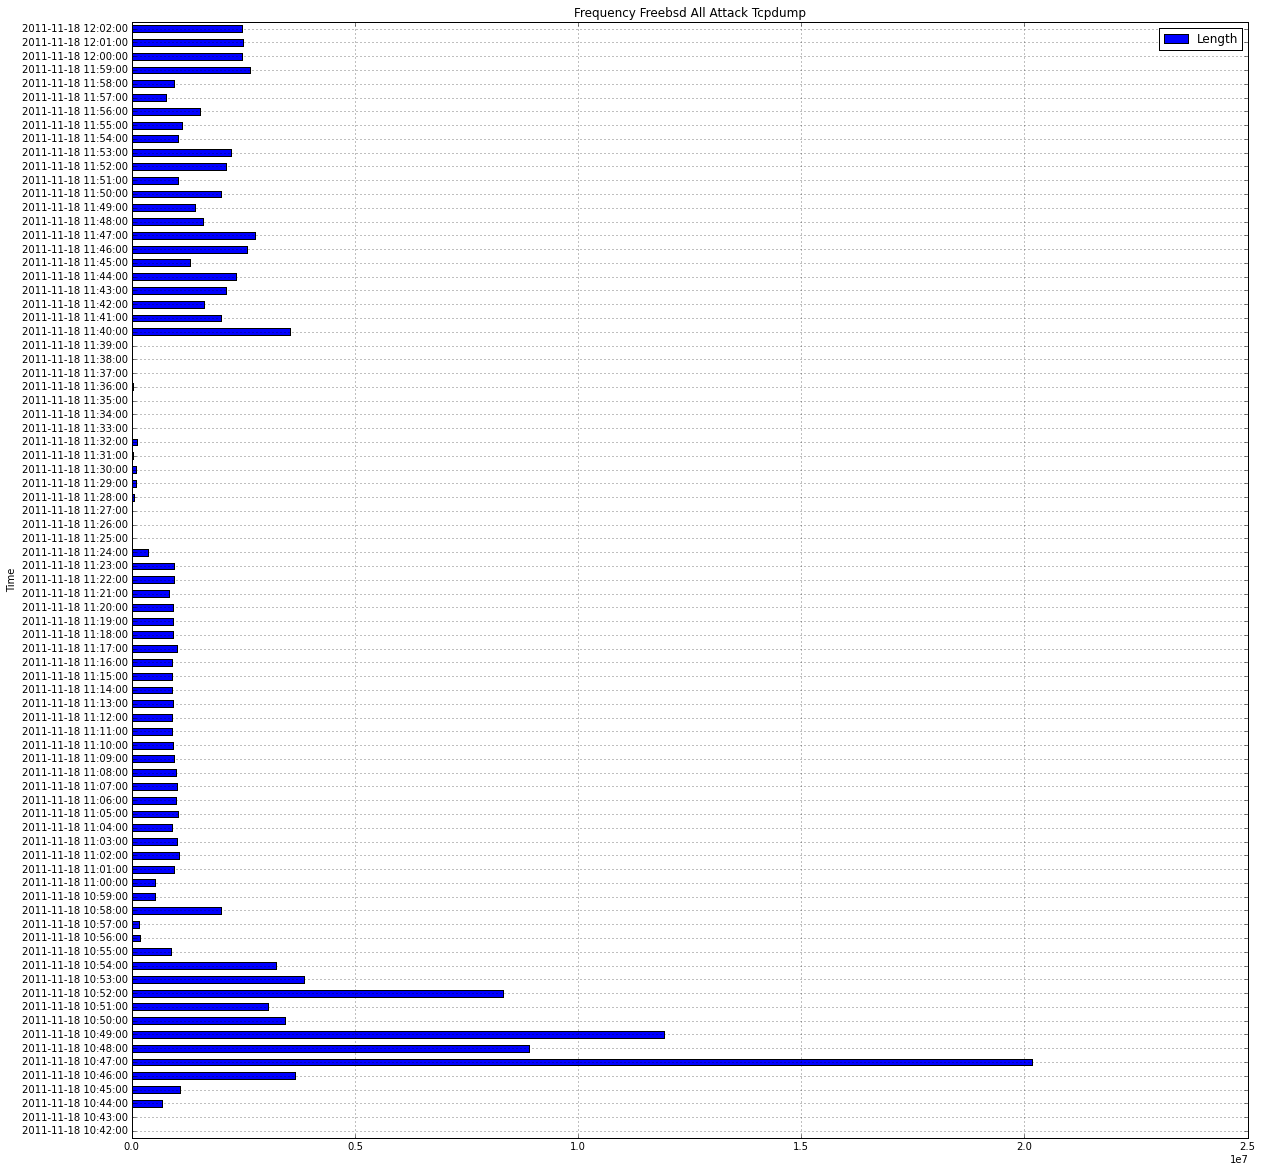

In [16]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Freebsd All Attack Tcpdump",figsize=(20,20),legend=True)

In [10]:
fig = infodata2_plot.get_figure()
fig.savefig("Frequency Freebsd All Attack Tcpdump all.png")

In [11]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 10:42:32,10.10.10.15,10.10.10.255,BROWSER,243,"Local Master Announcement XP, Workstation, Ser...",Client
1,2,2011-11-18 10:43:14,3com_68:a6:95,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.1,Server
2,3,2011-11-18 10:43:46,10.10.10.10,224.0.0.251,MDNS,78,"Standard query 0x0000 SRV _domain._udp.local,...",Server
3,4,2011-11-18 10:44:04,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15,Server
4,5,2011-11-18 10:44:04,3com_68:a6:95,Tp-LinkT_b5:79:3f,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95,Server


In [12]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

No.    Length
Source      Destination Protocol                      
10.10.10.1  10.10.10.15 TCP          1201946       180
10.10.10.10 10.10.10.15 HTTP      7080033103  19429555
                        ICMP      4892662063   2491426
                        IPv4      9592372386  18335676
                        MDNS          133711       881

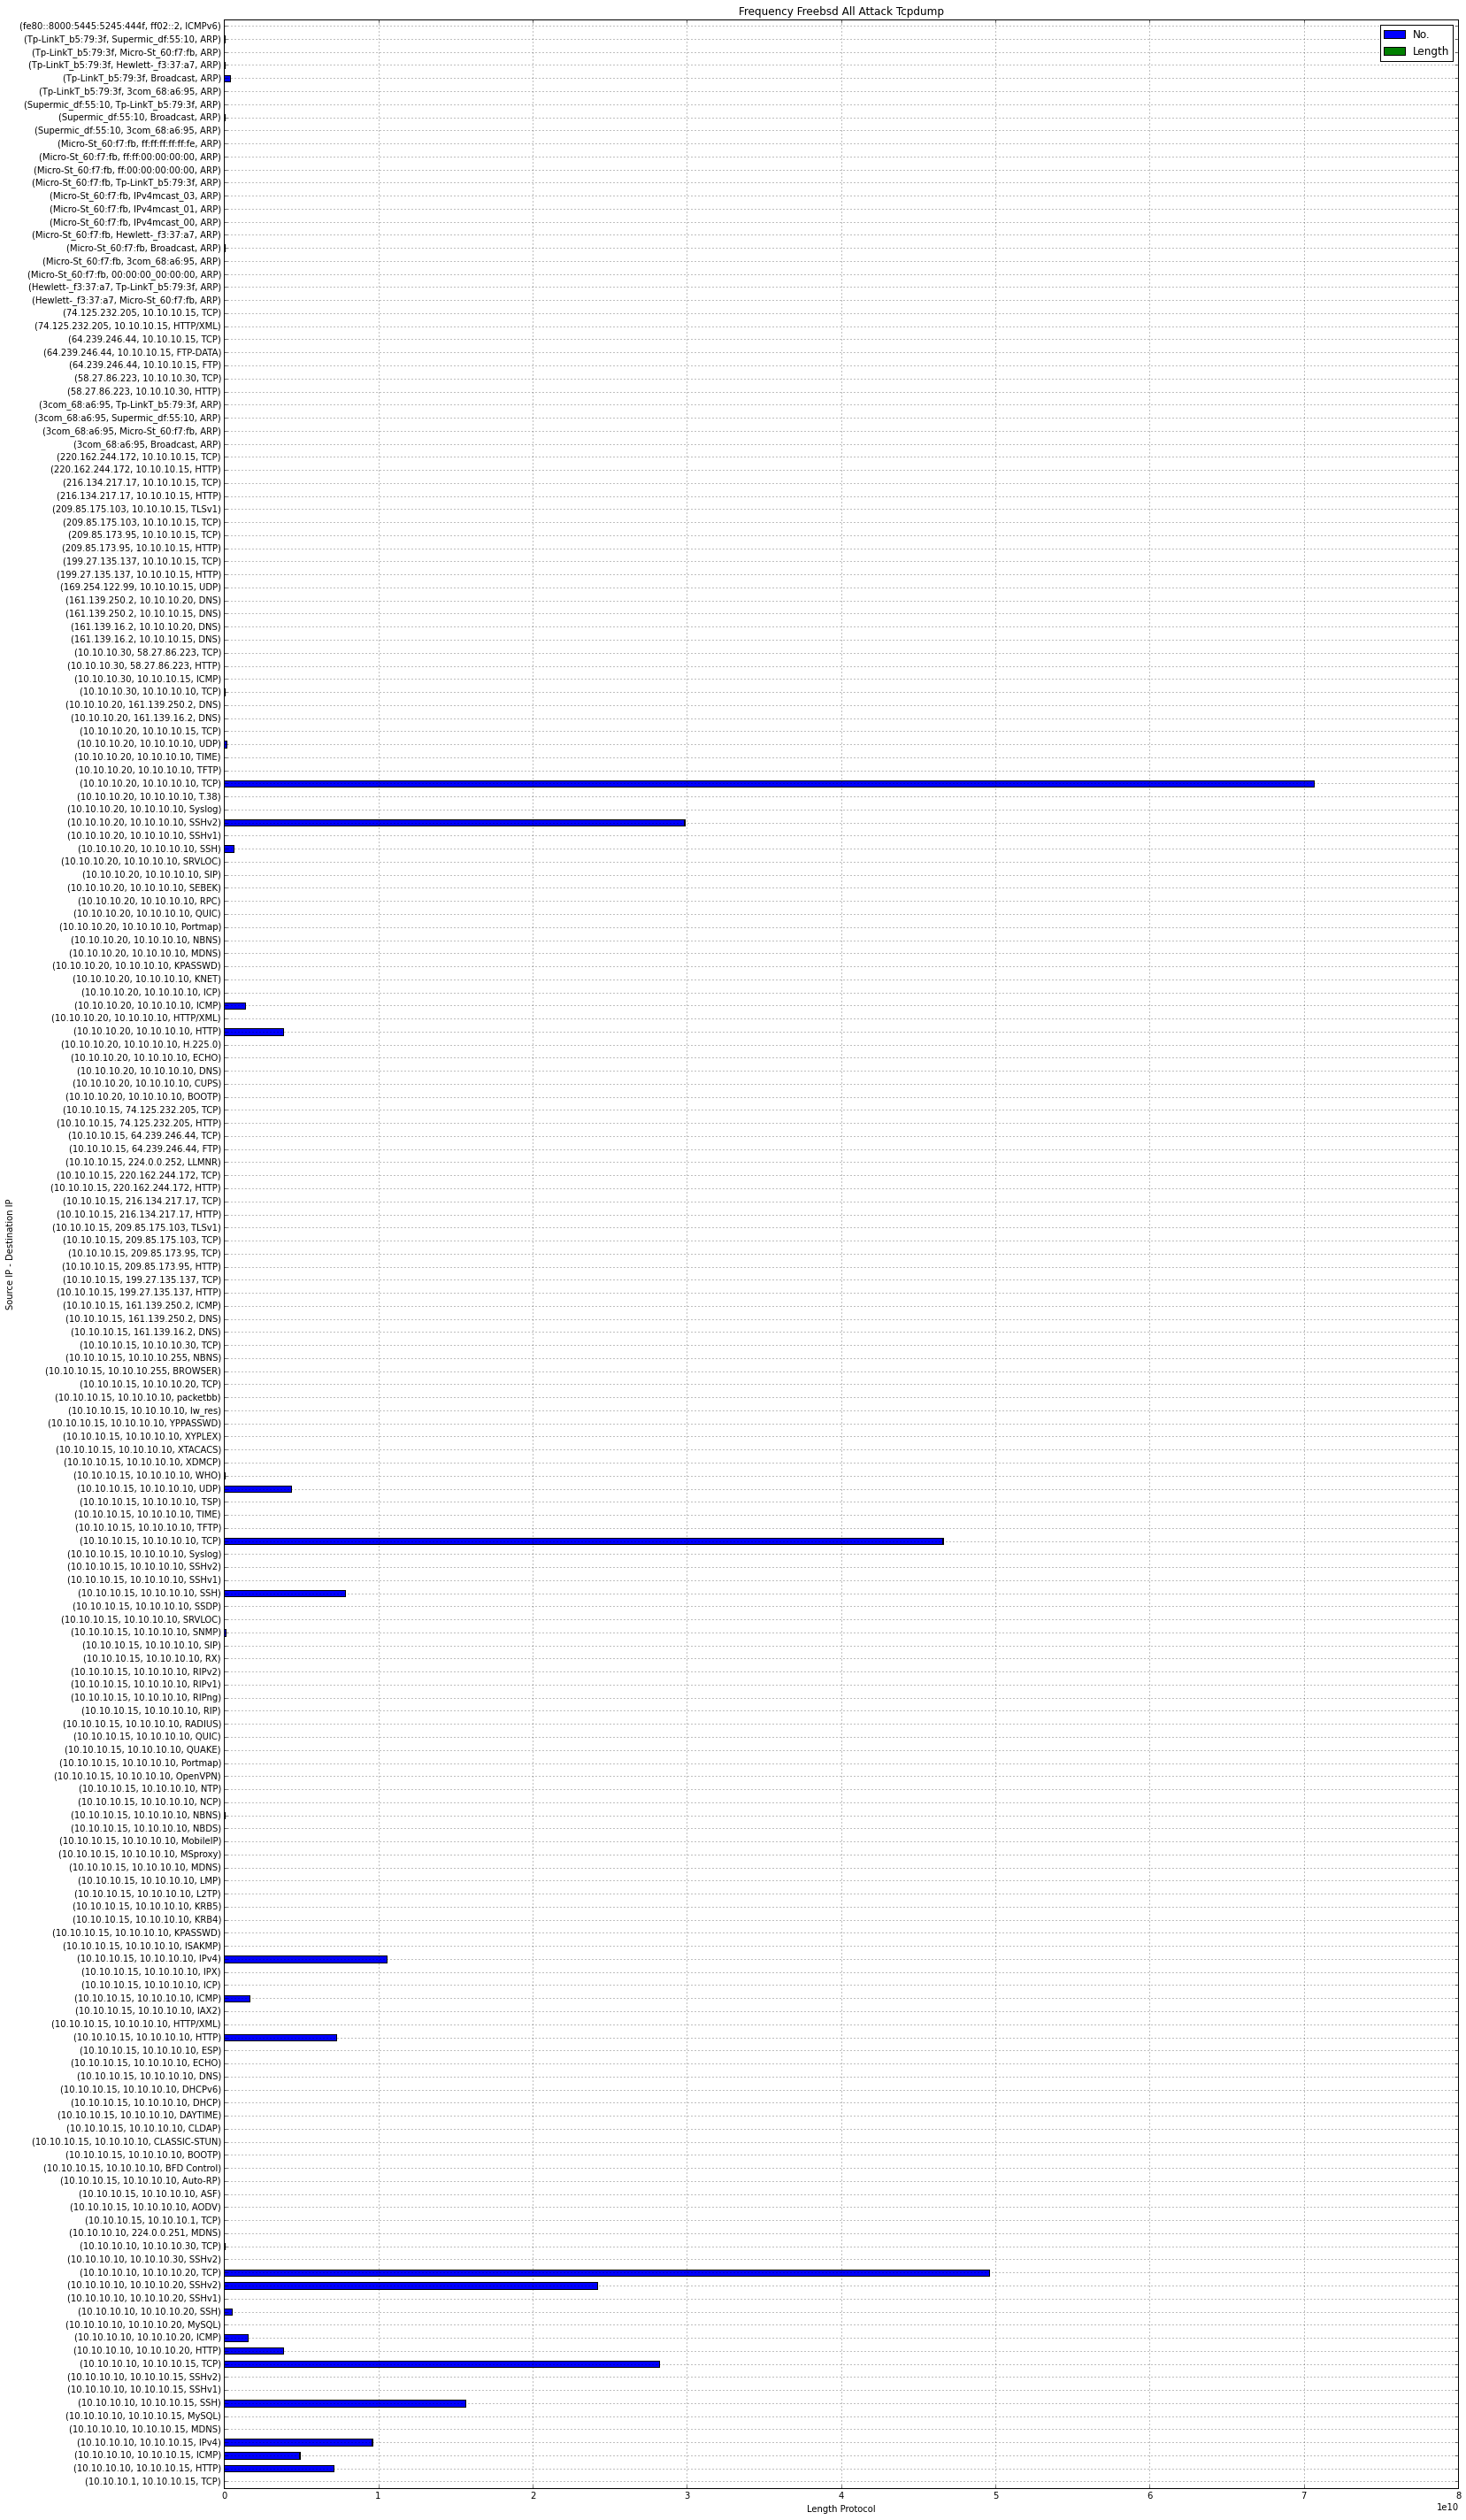

In [17]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Freebsd All Attack Tcpdump",figsize=(25,50))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [18]:
fig = infodata2_plot.get_figure()
fig.savefig("Frequency Freebsd All Attack Tcpdump.png")

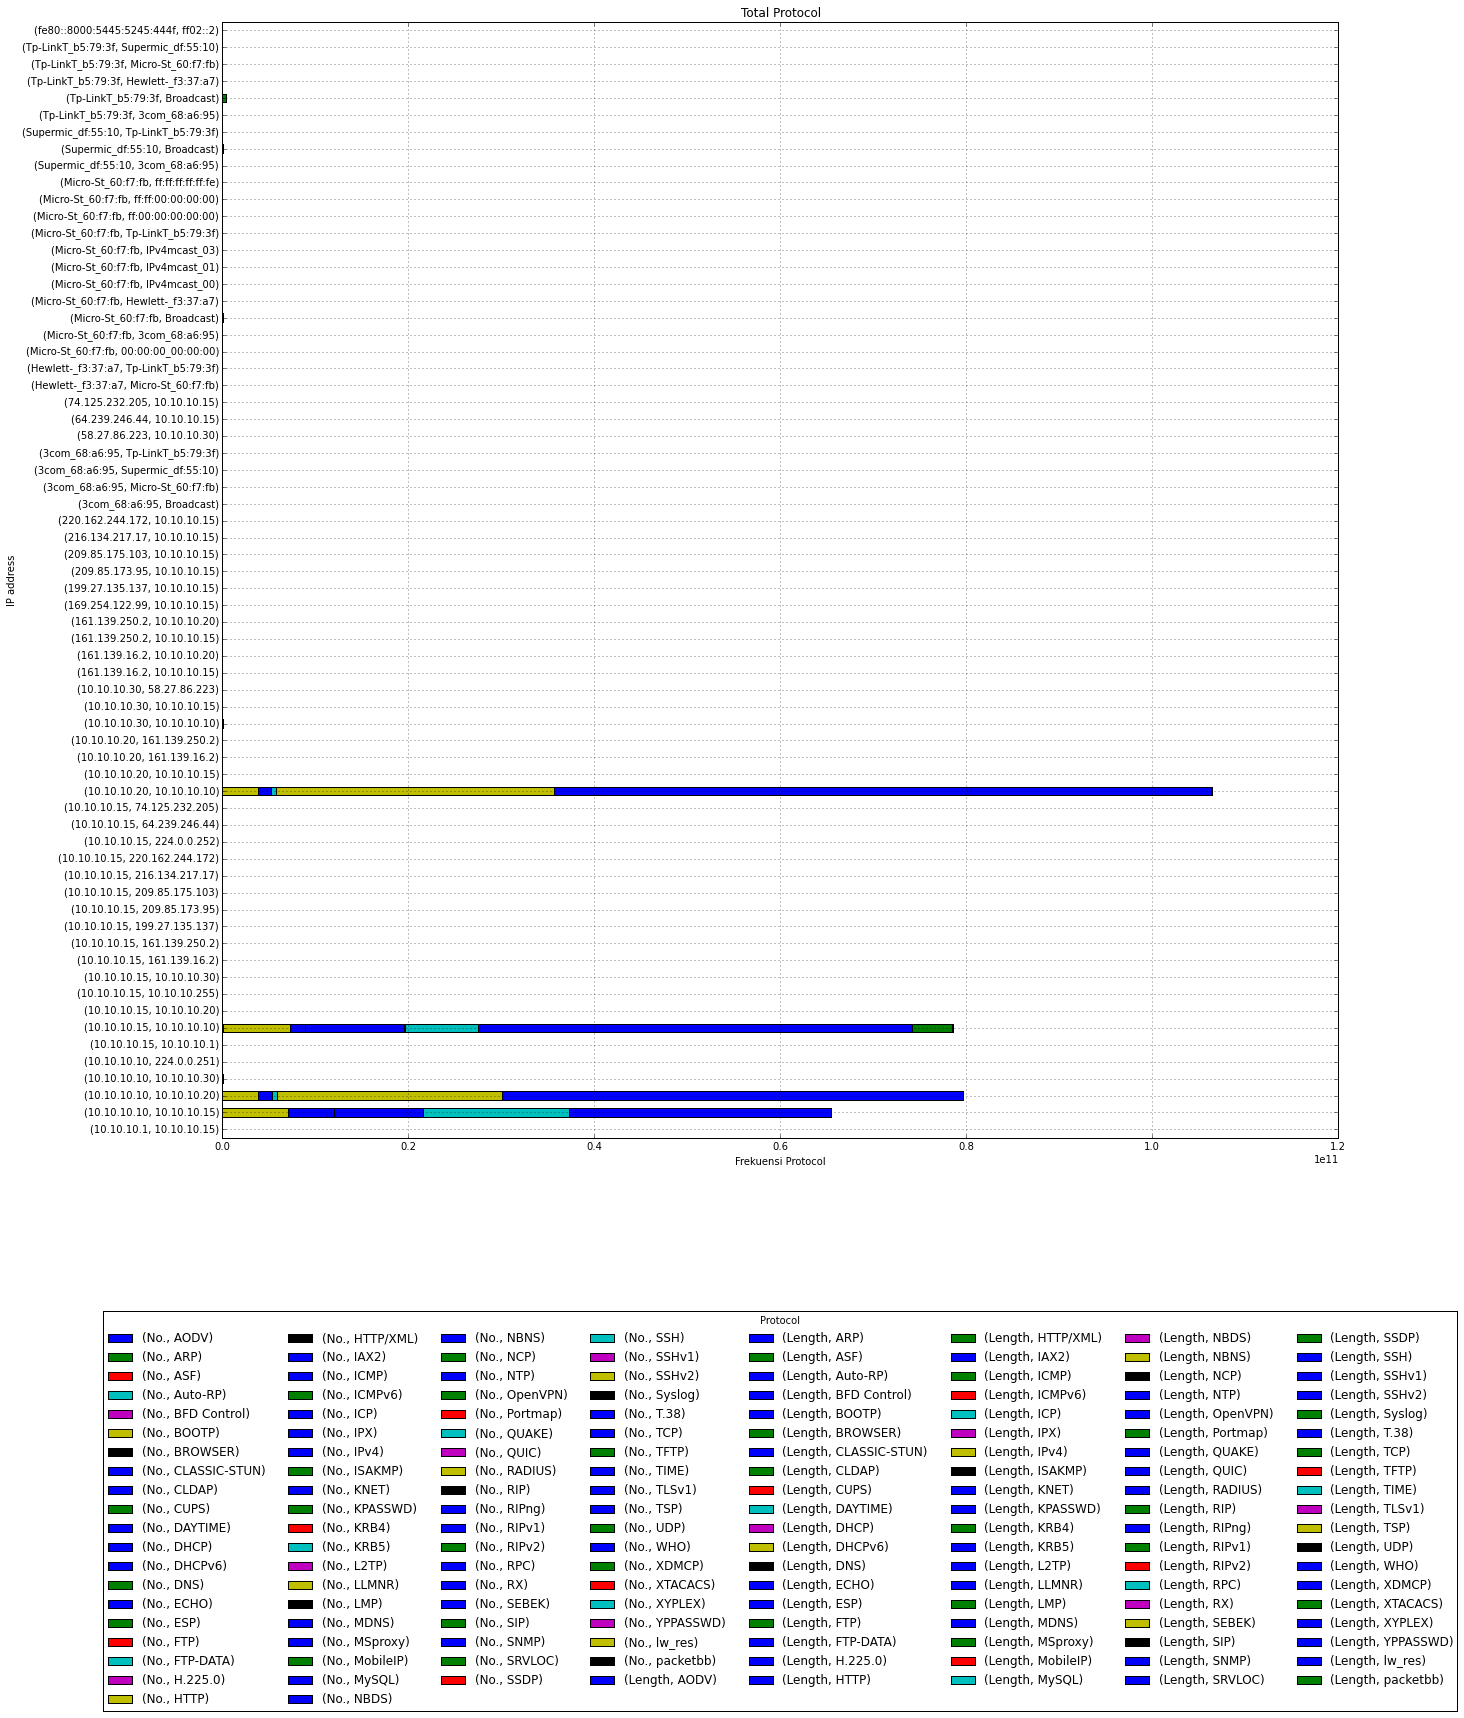

In [19]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")